# 4b - Discussion : comparison between bias correction time period options, and with other overshoot climate models and scenarios

- for potential discussion: influence of the period options of the bias correction (1980-2019 vs 2000-2019), and with other overshoot climate models and scenarios
- at the moment, the analysis in this notebook is not used anymore for any main or supplementary figures as it got too complex for this rather conceptual study 

---
#### Conclusion

- **using the bias correction period 2000-2019 results in 8% less glacier mass in 2500 for most scenarios compared to the bias correction period 1980-2019. The differences between the overshoot scenario and the  stabilisation scenario in 2500 are, however, similar for the two bias correction periods .**
- quantitative comparison of scenarios and overshoot GCMs behaviors is complex. More climate models that are forced with idealised scenarios would be necessary to do meaningful analyis...

####

In [1]:
# updated script version for flattening gfdl-esm2m overshoot stabilisation scenarios from university of Bern 
from oggm import utils
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
# get the dataset where coordinates of glaciers are stored
frgi = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5')
#frgi = '/home/users/lschuster/glacierMIP/rgi62_stats.h5'
odf = pd.read_hdf(frgi, index_col=0)
odf['coords'] = [(lon,lat) for lon,lat in zip(odf['CenLon'],odf['CenLat'])]

In [2]:
gcms_cmip6_2300 = pd.read_csv('/home/www/oggm/cmip6/all_gcm_list_2300.csv', index_col=0)  

In [3]:
pd_clim_all = pd.read_csv('../data/annual_glob_rgi_reg_basin_temp_precip_timeseries_oversh_stab.csv', index_col = 'Unnamed: 0')
# loads the aggregated runs w. both bias correction periods (1980-2019 and 2000-2019) 
# for comparison between the two approaches by using the common running glaciers of both periods together
df_scenario = xr.open_dataset(f'../data/additional_data/common_running_sum_all_rgi_reg_oversh_stab_2000_2500.nc')

In [11]:
df_scenario_glob_vol = df_scenario.sum(dim='rgi_reg').volume
df_scenario_glob_vol_final_rel = 100*df_scenario_glob_vol.sel(time=2500)/df_scenario_glob_vol.sel(time=2020)

In [39]:
df_scenario_glob_vol.sel(time=2020)

<xarray.DataArray 'volume' (bias_correction: 2, scenario: 8, gcm: 1)>
array([[[1.4993675e+14],
        [1.5005649e+14],
        [1.5005978e+14],
        [1.4952969e+14],
        [1.4994367e+14],
        [1.5004970e+14],
        [1.5005649e+14],
        [1.5006430e+14]],

       [[1.4965179e+14],
        [1.5005688e+14],
        [1.4965726e+14],
        [1.4924486e+14],
        [1.4965146e+14],
        [1.5005988e+14],
        [1.5006404e+14],
        [1.5006673e+14]]], dtype=float32)
Coordinates:
    time             float64 2.02e+03
    hydro_year       int64 2020
    calendar_year    int64 2020
    calendar_month   int64 1
  * gcm              (gcm) object 'GFDL-ESM2M'
  * scenario         (scenario) object 'oversh_T20OS15' ... 'stab_T30'
  * bias_correction  (bias_correction) object 'bc_1980_2019' 'bc_2000_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'

In [12]:
df_scenario_glob_vol_final_rel

<xarray.DataArray 'volume' (bias_correction: 2, scenario: 8, gcm: 1)>
array([[[60.637127],
        [54.414013],
        [52.390587],
        [70.19029 ],
        [63.66851 ],
        [53.368362],
        [44.535717],
        [38.193905]],

       [[52.4642  ],
        [46.53878 ],
        [44.53952 ],
        [61.6668  ],
        [55.070335],
        [45.39359 ],
        [37.101185],
        [31.09248 ]]], dtype=float32)
Coordinates:
    calendar_month   int64 1
  * gcm              (gcm) object 'GFDL-ESM2M'
  * scenario         (scenario) object 'oversh_T20OS15' ... 'stab_T30'
  * bias_correction  (bias_correction) object 'bc_1980_2019' 'bc_2000_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'

In [13]:
df_scenario_glob_vol_final_rel.sel(scenario='stab_T15') - df_scenario_glob_vol_final_rel.sel(scenario='oversh_T30OS15')

<xarray.DataArray 'volume' (bias_correction: 2, gcm: 1)>
array([[11.277924],
       [10.530815]], dtype=float32)
Coordinates:
    calendar_month   int64 1
  * gcm              (gcm) object 'GFDL-ESM2M'
  * bias_correction  (bias_correction) object 'bc_1980_2019' 'bc_2000_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'

-> for the other bias correction option. The absolute values are quite different, but the 

In [38]:
df_scenario_glob_vol_final_rel.sel(bias_correction='bc_1980_2019') - df_scenario_glob_vol_final_rel.sel(bias_correction='bc_2000_2019')

<xarray.DataArray 'volume' (scenario: 8, gcm: 1)>
array([[8.172928 ],
       [7.8752327],
       [7.8510666],
       [8.523491 ],
       [8.598175 ],
       [7.9747734],
       [7.434532 ],
       [7.101425 ]], dtype=float32)
Coordinates:
    calendar_month  int64 1
  * gcm             (gcm) object 'GFDL-ESM2M'
  * scenario        (scenario) object 'oversh_T20OS15' ... 'stab_T30'
    OGGM_version    <U22 'OGGM_v161_gdirs_2023.3'

### Older additional analysis  that also compares overshoot magnitudes of cmip6 to gfdl-esm2m (not in manuscript)
- However it is very complex to actually do the comparison, so we stopped working on trying to quantify it 

In [14]:

df_scenario_sel_bc = df_scenario.sel(bias_correction='bc_2000_2019')
pd_clim_all_global = pd_clim_all.loc[pd_clim_all.region =='global']
pd_clim_all_global.index = pd_clim_all_global.year

pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019 = pd.DataFrame(columns =['cum_temp_ch_2000_2019'] )
df_scenario_glob_sel_bc = df_scenario_sel_bc.sum(dim='rgi_reg')
final_glob_vol_rel = 100*df_scenario_glob_sel_bc.sel(time=2300).volume/df_scenario_glob_sel_bc.sel(time=2020).volume

init_runoff = df_scenario_glob_sel_bc.sel(time=slice(2000,2050)).runoff.mean(dim='time')
final_glob_runoff_50yr_rel = 100*df_scenario_glob_sel_bc.sel(time=slice(2250,2300)).runoff.mean(dim='time')/init_runoff

for scenario in pd_clim_all_global.scenario.unique()[1:]: # for bc_2000_2019 not yet the stabT12 run ...
    pd_clim_all_global_s = pd_clim_all_global.loc[pd_clim_all_global.scenario ==scenario]
    temp_50_yr_avg = pd_clim_all_global_s['temp'].rolling(50, center=True).mean().dropna()
    diff_max_end_global_tas = temp_50_yr_avg.max() - temp_50_yr_avg.loc[2275] 
    
    temp_ref_global_hist_ipcc = pd_clim_all_global_s.loc[1986:2005][['temp']].mean()
    temp_ref_global, precip_ref_global = pd_clim_all_global_s.loc[2000:2019][['temp','precip']].mean()
    _temp_ch_cum_sum = (pd_clim_all_global_s.loc[2000:2300, 'temp']-temp_ref_global).sum()
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                         'cum_temp_ch_2000_2019'] = _temp_ch_cum_sum
    
    _deltaT_2100 = pd_clim_all_global_s.loc[2071:2100, 'temp'].mean() - temp_ref_global_hist_ipcc + 0.69
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                     'temp_ch_2071_2100_ipcc'] = _deltaT_2100.values

    _deltaT_2300 = pd_clim_all_global_s.loc[2271:2300, 'temp'].mean() - temp_ref_global_hist_ipcc + 0.69
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                     'temp_ch_2271_2300_ipcc'] = _deltaT_2300.values 
    
    
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                         'vol_2300_%'] = final_glob_vol_rel.sel(scenario=scenario).squeeze()
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                         'runoff_2300_50_yr_avg_%'] = final_glob_runoff_50yr_rel.sel(scenario=scenario).squeeze()
    
    if 'oversh' in scenario:
        pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                             'overshoot'] = 'yes'
    else:
        pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                             'overshoot'] = 'no'
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario, 'overshoot_magnitude'] = diff_max_end_global_tas


In [15]:
### now the same for default 1980-2019 bias correction...
#df_scenario = xr.open_dataset(f'../data/common_running_sum_all_provide_reg_oversh_stab_2000_2500_bc_1980_2019.nc')
df_scenario_sel_bc = df_scenario.sel(bias_correction='bc_1980_2019')

pd_clim_all_global = pd_clim_all.loc[pd_clim_all.region =='global']
pd_clim_all_global.index = pd_clim_all_global.year

pd_cum_glob_temp_ch_vs_volume_ch_gfdl = pd.DataFrame(columns =['cum_temp_ch_2000_2019'] )
df_scenario_glob = df_scenario_sel_bc.sum(dim='rgi_reg')
final_glob_vol_rel = 100*df_scenario_glob.sel(time=2300).volume/df_scenario_glob.sel(time=2020).volume
init_runoff = df_scenario_glob.sel(time=slice(2000,2050)).runoff.mean(dim='time')
final_glob_runoff_50yr_rel = 100*df_scenario_glob.sel(time=slice(2250,2300)).runoff.mean(dim='time')/init_runoff

for scenario in pd_clim_all_global.scenario.unique():
    pd_clim_all_global_s = pd_clim_all_global.loc[pd_clim_all_global.scenario ==scenario]
    temp_50_yr_avg = pd_clim_all_global_s['temp'].rolling(50, center=True).mean().dropna()
    diff_max_end_global_tas = temp_50_yr_avg.max() - temp_50_yr_avg.loc[2275]
    temp_ref_global_hist_ipcc = pd_clim_all_global_s.loc[1986:2005][['temp']].mean()

    temp_ref_global, precip_ref_global = pd_clim_all_global_s.loc[2000:2019][['temp','precip']].mean()
    _temp_ch_cum_sum = (pd_clim_all_global_s.loc[2000:2300, 'temp']-temp_ref_global).sum()
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                         'cum_temp_ch_2000_2019'] = _temp_ch_cum_sum
    
    _deltaT_2100 = pd_clim_all_global_s.loc[2071:2100, 'temp'].mean() - temp_ref_global_hist_ipcc + 0.69
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                      'temp_ch_2071_2100_ipcc'] = _deltaT_2100.values

    _deltaT_2300 = pd_clim_all_global_s.loc[2271:2300, 'temp'].mean() - temp_ref_global_hist_ipcc + 0.69
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                     'temp_ch_2271_2300_ipcc'] = _deltaT_2300.values
    
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                         'vol_2300_%'] = final_glob_vol_rel.sel(scenario=scenario).squeeze()
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                         'runoff_2300_50_yr_avg_%'] = final_glob_runoff_50yr_rel.sel(scenario=scenario).squeeze()
    #pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
    #                                         'vol_2500_%'] = final_glob_vol_rel.sel(scenario=scenario).squeeze()

    if 'oversh' in scenario:
        pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                             'overshoot'] = 'yes'
    else:
        pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                             'overshoot'] = 'no'
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario, 'overshoot_magnitude'] = diff_max_end_global_tas


In [16]:
pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019['overshoot_magnitude']

stab_T15          0.036741
oversh_T20OS15    0.284413
oversh_T25OS15    0.562675
oversh_T30OS15    0.888484
stab_T20          0.165119
stab_T25          0.112280
stab_T30          0.106363
Name: overshoot_magnitude, dtype: float64

In [17]:
pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019['option'] = 'gfdl-esm2m_bc_2000_2019'
pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019['bc'] = 'bc_2000_2019'
pd_cum_glob_temp_ch_vs_volume_ch_gfdl['option'] = 'gfdl-esm2m_bc_1980_2019'
pd_cum_glob_temp_ch_vs_volume_ch_gfdl['bc'] = 'bc_1980_2019'

In [18]:
pd_cum_glob_temp_ch_vs_volume_ch_all = pd.concat([pd_cum_glob_temp_ch_vs_volume_ch_gfdl,
                                                  pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019])
pd_cum_glob_temp_ch_vs_volume_ch_all['gcm'] = 'gfdl-esm2m'

<AxesSubplot:xlabel='cum_temp_ch_2000_2019', ylabel='vol_2300_%'>

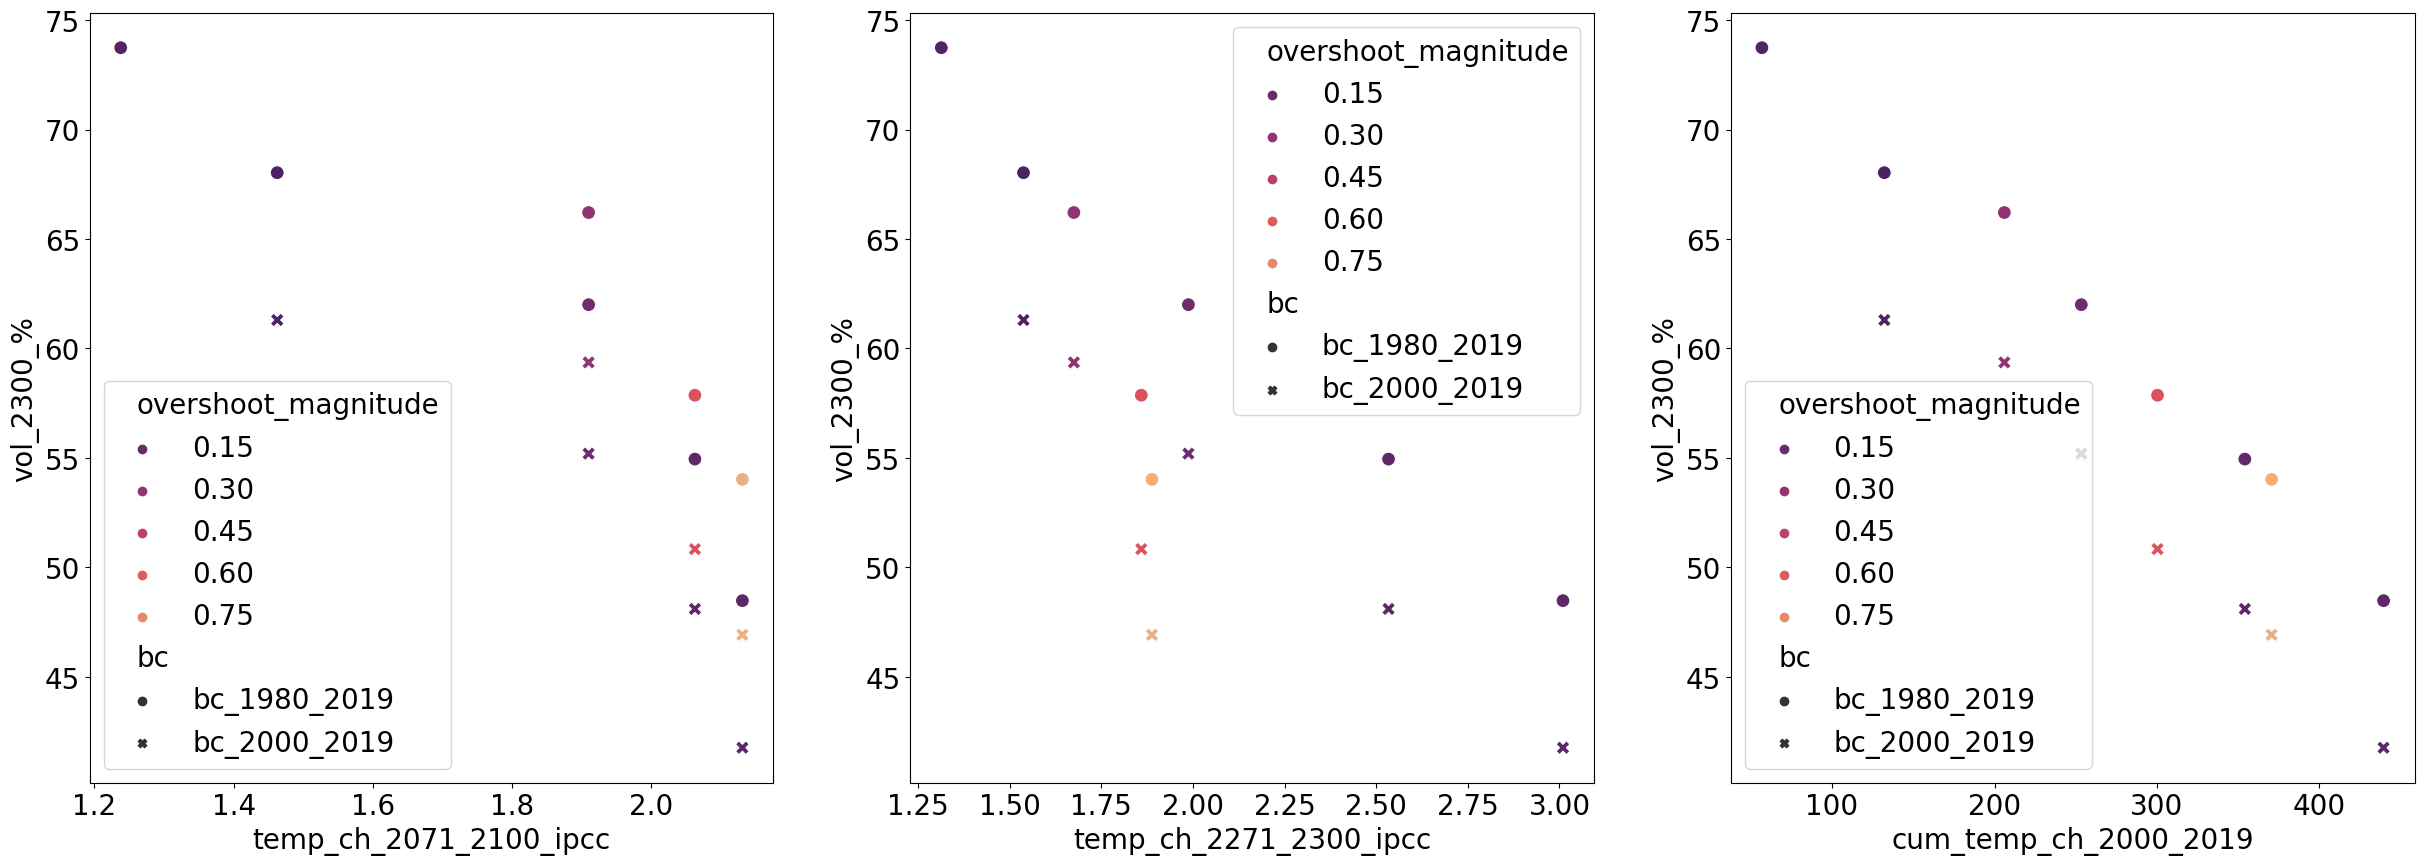

In [19]:
plt.rc('font', size=20)

plt.figure(figsize=(30,10))

plt.subplot(131)
sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all,
               y='vol_2300_%', x='temp_ch_2071_2100_ipcc', color='black', style='bc',s=100,
                hue='overshoot_magnitude', palette='flare_r')
plt.subplot(132)
sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all,
               y='vol_2300_%', x='temp_ch_2271_2300_ipcc', color='black', style='bc', #hue='overshoot'
                 hue='overshoot_magnitude', palette='flare_r',s=100,
               )
plt.subplot(133)

sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all,
               y='vol_2300_%', x='cum_temp_ch_2000_2019', color='black', style='bc', #hue='overshoot'
                hue='overshoot_magnitude', palette='flare_r', s=100,
               )

#sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all.loc[pd_cum_glob_temp_ch_vs_volume_ch_all.overshoot=='yes'],
#               y='vol_2300_%', x='cum_temp_ch_2000_2019', color='grey', style='bc', hue='overshoot')

Text(0.5, 0, 'Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')

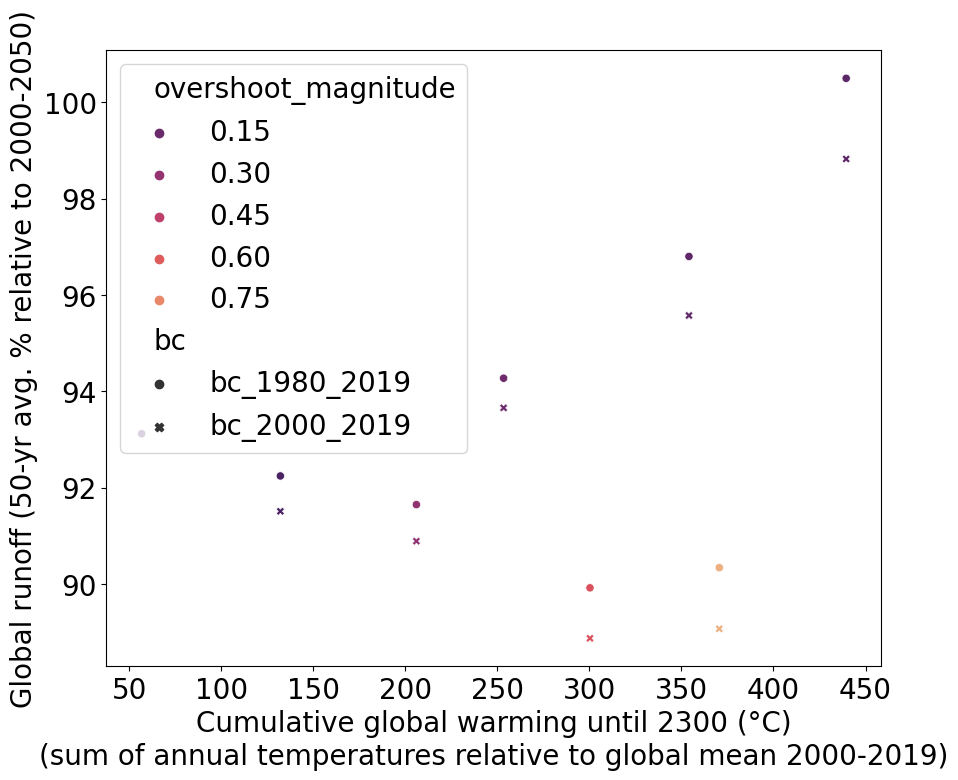

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all,
               y='runoff_2300_50_yr_avg_%', x='cum_temp_ch_2000_2019',
                hue='overshoot_magnitude', style='bc', palette='flare_r')
plt.ylabel('Global runoff (50-yr avg. % relative to 2000-2050)')
plt.xlabel('Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')

In [25]:
fpath = '/home/www/oggm/oggm-standard-projections/oggm-standard-projections-csv-files/1.6.1/common_running_2100_2300/volume'
gcms_cmip6_2300 = pd.read_csv('/home/www/oggm/cmip6/all_gcm_list_2300.csv', index_col=0)  
gcms_cmip5_2300 = pd.read_csv('/home/www/oggm/cmip5-ng/all_gcm_list_2300.csv', index_col=0)  

scenarios_cmip5 = ['rcp26', 'rcp45']
scenarios_cmip6 = ['ssp126','ssp534-over']
pa='/home/www/oggm/oggm-standard-projections/analysis_notebooks'
cmip = 'CMIP6'
df_scenario_cmip6_2300_runoff = xr.open_dataset(f'{pa}/runoff_evol_per_rgi_reg_common_running_glaciers_oggm_all_exp_v16_2023.3_bc_2000_2019_{cmip}_endyr{endyr}.nc')
df_scenario_cmip6_2300_runoff = df_scenario_cmip6_2300_runoff.sel(hist='w5e5_gcm_merged')


In [26]:
endyr = 2300
pd_cum_glob_temp_ch_vs_volume_ch = pd.DataFrame(columns =['cum_temp_ch_2000_2019'])
for cmip, scenarios in zip(['CMIP5', 'CMIP6'], [scenarios_cmip5, scenarios_cmip6]):
    if cmip == 'CMIP6':
        gcms_cmip_2300 = gcms_cmip6_2300
    else:
        gcms_cmip_2300 = gcms_cmip5_2300

    for scenario in scenarios: # ,'ssp585']: (those are just too extreme, we don't want them...)
        gcms_cmip_2300_over = gcms_cmip_2300.loc[(gcms_cmip_2300[scenario[:3]] ==scenario) & (gcms_cmip_2300['var'] =='tas')]
        for f in gcms_cmip_2300_over.index:
            gcm = gcms_cmip_2300_over.loc[f]['gcm']
            dtas_annual = xr.open_dataset(gcms_cmip_2300_over.loc[f]['path'],
                                          use_cftime=True).sel(time=slice('2000','2300')).tas.groupby('time.year').mean()
            weight = np.cos(np.deg2rad(dtas_annual.lat))
            weight = weight / weight.sum()

            # get the global means for every month:        
            global_dtas = (dtas_annual.mean(dim='lon') * weight).sum(dim='lat')
            global_dtas_50yr = global_dtas.rolling(year=50, center = True).mean().dropna(dim='year')
            diff_max_end_global_tas = (global_dtas_50yr.max() - global_dtas_50yr.isel(year=-1)).values
            _temp_ch_cum_sum = (global_dtas - global_dtas.sel(year=slice(2000,2019)).mean().values).sum().values
            _deltaT_2100 = global_dtas.sel(year=slice(2071,2100)).mean() - global_dtas.sel(year=slice(1986,2005)).mean() +0.69
            _deltaT_2300 = global_dtas.sel(year=slice(2271,2300)).mean() - global_dtas.sel(year=slice(1986,2005)).mean() +0.69
            
            for model in ['OGGM','PyGEM-OGGM','GloGEM']:
                if (model == 'GloGEM') and (cmip == 'CMIP5'):
                    continue
                #if model in ['PyGEM-OGGM','GloGEM']:
                _fpath_other_gmodels = '/home/users/lschuster/glacier-model-projections-until2300/glacier_model_csv_files'
                fpath_gmodels = f'{_fpath_other_gmodels}/{model}/volume/{cmip}/{endyr}/global/{scenario}.csv'
                #else:
                #fpath_gmodels = f'{fpath}/{cmip}/{endyr}/global/{scenario}.csv'
                pd_cmip_scen = pd.read_csv(fpath_gmodels, index_col=0)
                pd_cmip_scen = pd_cmip_scen.dropna()
                pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}',
                                                 'cum_temp_ch_2000_2019'] = _temp_ch_cum_sum

                pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}',
                                                 'temp_ch_2071_2100_ipcc'] = _deltaT_2100

                pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}',
                                                 'temp_ch_2271_2300_ipcc'] = _deltaT_2300
                try:
                    pd_cmip_scen.columns = [c.upper() for c in pd_cmip_scen.columns]
                    df_scenario_cmip_2300_s = pd_cmip_scen[gcm.upper()]

                    df_scenario_cmip_2300_vol_s_rel = 100*df_scenario_cmip_2300_s.loc[2300]/df_scenario_cmip_2300_s.loc[2020]

                    pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}',
                                                         'vol_2300_%'] = df_scenario_cmip_2300_vol_s_rel
                    
                    
                    if scenario =='ssp534-over':
                        pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}',
                                                             'overshoot'] = 'yes' # (SSP 5-3.4'
                    elif scenario == 'ssp126':
                        pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}',
                                                             'overshoot'] = 'small (SSP 1-2.6)'
                    else:
                        pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}',
                                                     'overshoot'] = 'no' # (CMIP5)'
                    pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}', 'overshoot_magnitude'] = diff_max_end_global_tas
                    pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}','gcm'] = f'CMIP'
                    pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_{cmip}_{model}','Model'] = f'{model}'
                    
                    
                    
                except:
                    print(f'{gcm}_{scenario}_{cmip}_{model}')
            
            if cmip == 'CMIP6':
                df_scenario_cmip6_2300_s_runoff = df_scenario_cmip6_2300_runoff.sel(gcm_scenario=f'{gcm}_{scenario}').sum(dim='rgi_reg').runoff
                init_runoff = df_scenario_cmip6_2300_s_runoff.sel(time=slice(2000,2050)).mean(dim='time')
                df_scenario_cmip6_2300_s_runoff = 100*df_scenario_cmip6_2300_s_runoff.sel(time=slice(2250,2300)).mean(dim='time')/init_runoff
                pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{scenario}_CMIP6_OGGM',
                                                             'runoff_2300_50_yr_avg_%'] = df_scenario_cmip6_2300_s_runoff.values

IPSL-CM6A-LR_ssp534-over_CMIP6_GloGEM


In [27]:
#pd_cum_glob_temp_ch_vs_volume_ch = pd_cum_glob_temp_ch_vs_volume_ch.astype('float')
pd_cum_glob_temp_ch_vs_volume_ch['bc'] = 'bc_2000_2019'
pd_cum_glob_temp_ch_vs_volume_ch_all['Model'] = 'OGGM'
ALL_cum_glob_temp_ch_vs_volume_ch_all = pd.concat([pd_cum_glob_temp_ch_vs_volume_ch_all,
                                                  pd_cum_glob_temp_ch_vs_volume_ch])
ALL_cum_glob_temp_ch_vs_volume_ch_all[['cum_temp_ch_2000_2019', 'vol_2300_%',
                                       'runoff_2300_50_yr_avg_%']] = ALL_cum_glob_temp_ch_vs_volume_ch_all[['cum_temp_ch_2000_2019',
                                                                                                            'vol_2300_%','runoff_2300_50_yr_avg_%']].astype(float)

In [28]:
ALL_cum_glob_temp_ch_vs_volume_ch_all['gcm_bc'] = ALL_cum_glob_temp_ch_vs_volume_ch_all['gcm'] +  '\n' + ALL_cum_glob_temp_ch_vs_volume_ch_all['bc']

In [29]:
ALL_cum_glob_temp_ch_vs_volume_ch_all[['cum_temp_ch_2000_2019', 'vol_2300_%',
                                       'runoff_2300_50_yr_avg_%', 'Model']].dropna()

,cum_temp_ch_2000_2019,vol_2300_%,runoff_2300_50_yr_avg_%,Model
stab_T12,56.821447,73.740257,93.121834,OGGM
stab_T15,132.175887,68.029770,92.245216,OGGM
oversh_T20OS15,206.050516,66.209366,91.650215,OGGM
oversh_T25OS15,300.327276,57.861454,89.923218,OGGM
oversh_T30OS15,370.562555,54.015949,90.341911,OGGM
stab_T20,253.415420,61.999538,94.273872,OGGM
stab_T25,354.090339,54.943607,96.801300,OGGM
stab_T30,439.475723,48.474792,100.498055,OGGM
stab_T15,132.175887,61.298336,91.511795,OGGM
oversh_T20OS15,206.050516,59.361828,90.892326,OGGM


In [30]:
oggm_cum_glob_temp_ch_vs_volume_ch_all = ALL_cum_glob_temp_ch_vs_volume_ch_all.loc[ALL_cum_glob_temp_ch_vs_volume_ch_all.Model == 'OGGM']
other_models_cum_glob_temp_ch_vs_volume_ch_all = ALL_cum_glob_temp_ch_vs_volume_ch_all.loc[ALL_cum_glob_temp_ch_vs_volume_ch_all.Model != 'OGGM']

In [31]:
ALL_cum_glob_temp_ch_vs_volume_ch_all['gcm_bc'].unique()

array(['gfdl-esm2m\nbc_1980_2019', 'gfdl-esm2m\nbc_2000_2019',
       'CMIP\nbc_2000_2019', nan], dtype=object)

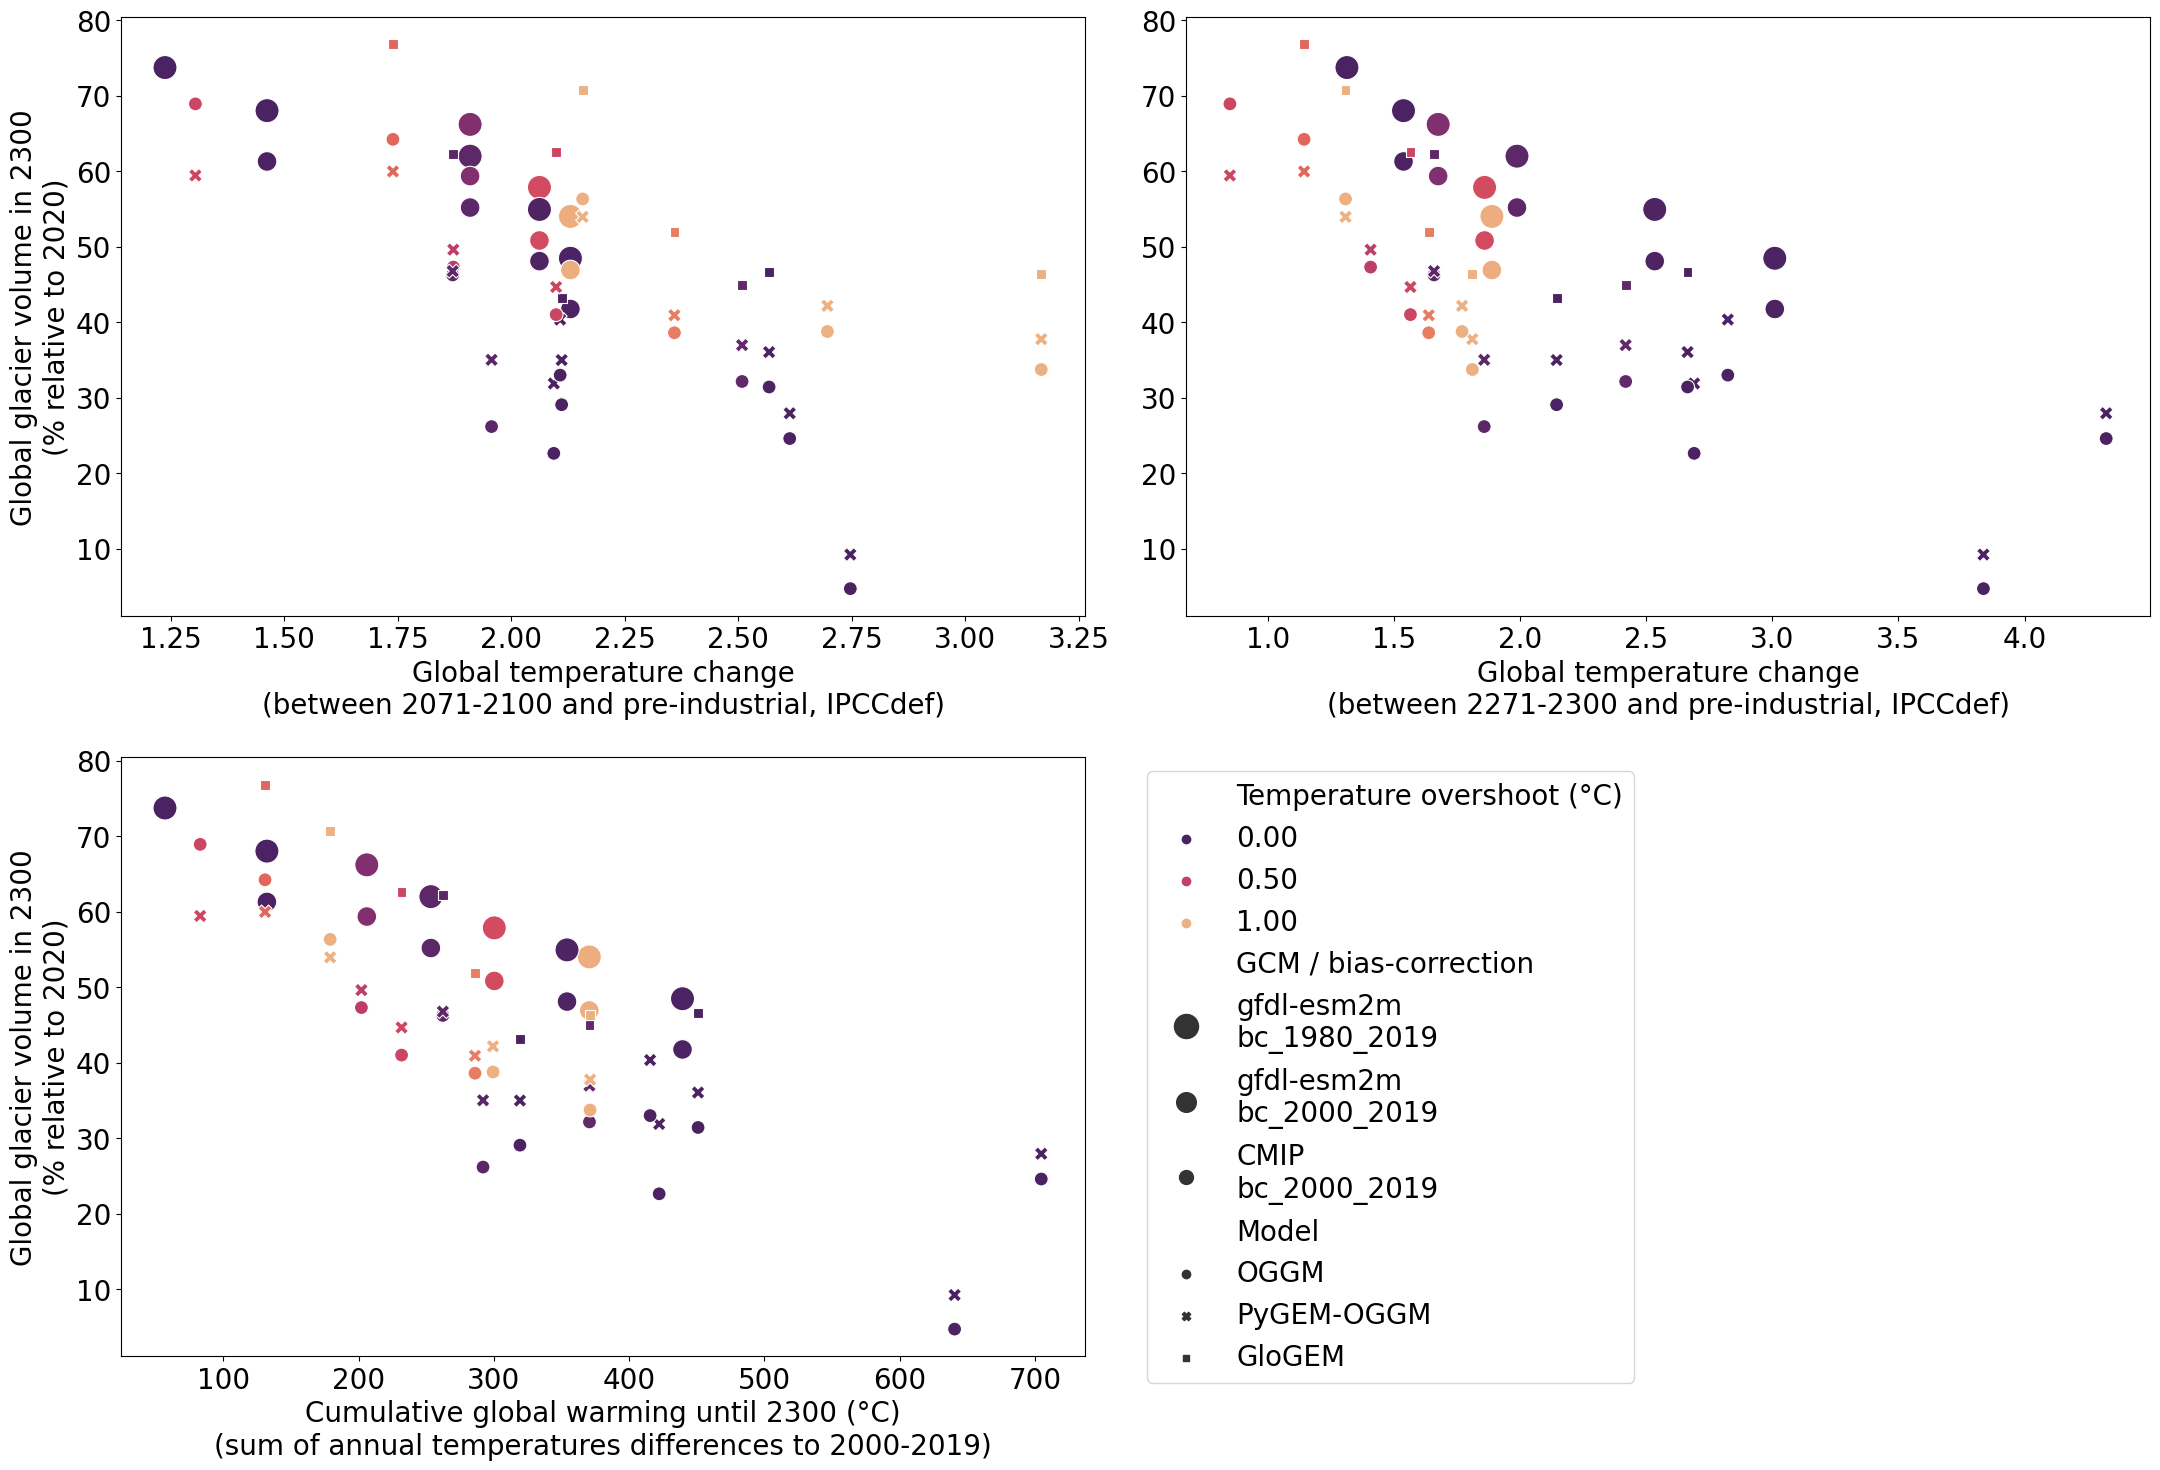

In [32]:
plt.rc('font', size=20)
norm = plt.Normalize(vmin=0.1,vmax=0.9)

plt.figure(figsize=(22,16))
plt.subplot(221)
sns.scatterplot(data=ALL_cum_glob_temp_ch_vs_volume_ch_all,
               y='vol_2300_%', x='temp_ch_2071_2100_ipcc', 
                style='Model',
                style_order=['OGGM', 'PyGEM-OGGM', 'GloGEM'],
                #style_order = ['no','yes', 'small (SSP 1-2.6)'], 
                size_order = ['gfdl-esm2m\nbc_1980_2019','gfdl-esm2m\nbc_2000_2019', 'CMIP\nbc_2000_2019'],
                hue='overshoot_magnitude', palette='flare_r',# s=100,
                size='gcm_bc', sizes =  [300,200,100], legend=False,
               hue_norm = norm)
plt.ylabel('Global glacier volume in 2300\n(% relative to 2020)')
plt.xlabel('Global temperature change\n(between 2071-2100 and pre-industrial, IPCCdef)')


plt.subplot(222)
sns.scatterplot(data=ALL_cum_glob_temp_ch_vs_volume_ch_all,
               y='vol_2300_%', x='temp_ch_2271_2300_ipcc', 
               style='Model',
                style_order=['OGGM', 'PyGEM-OGGM', 'GloGEM'],
                #style_order = ['no','yes', 'small (SSP 1-2.6)'], 
                size_order = ['gfdl-esm2m\nbc_1980_2019','gfdl-esm2m\nbc_2000_2019', 'CMIP\nbc_2000_2019'],
                hue='overshoot_magnitude', palette='flare_r',# s=100,
                size='gcm_bc', sizes = [300,200,100], legend=False,
               hue_norm = norm)

plt.ylabel('')
plt.xlabel('Global temperature change\n(between 2271-2300 and pre-industrial, IPCCdef)')

plt.subplot(223)
sns.scatterplot(data=ALL_cum_glob_temp_ch_vs_volume_ch_all,
               y='vol_2300_%', x='cum_temp_ch_2000_2019', style='Model',
                style_order=['OGGM', 'PyGEM-OGGM', 'GloGEM'],
                #style_order = ['no','yes', 'small (SSP 1-2.6)'], 
                #size_order = ['gfdl-esm2m_bc_1980_2019','gfdl-esm2m_bc_2000_2019', 'CMIP_bc_2000_2019'],
                size_order = ['gfdl-esm2m\nbc_1980_2019','gfdl-esm2m\nbc_2000_2019', 'CMIP\nbc_2000_2019'],
                hue='overshoot_magnitude', palette='flare_r',# s=100,
                size='gcm_bc', sizes = [300,200,100], legend='brief',
                hue_norm = norm
               )# size='overshoot')

plt.ylabel('Global glacier volume in 2300\n(% relative to 2020)')

plt.xlabel('Cumulative global warming until 2300 (°C)\n(sum of annual temperatures differences to 2000-2019)')
handles, labels = plt.gca().get_legend_handles_labels()

handles_n = [handles[0], handles[1], handles[3], handles[5]] + handles[7:]
labels_n = ['Temperature overshoot (°C)', labels[1], labels[3], labels[5]] + ['GCM / bias-correction']+ labels[8:]
plt.tight_layout()

plt.legend(handles_n, labels_n, ncol=1, loc= 'upper left', bbox_to_anchor=(1.05, 1))

#plt.savefig('figures/4_discussion_gcm_gmodel_comparison.pdf')
#plt.savefig('figures/4_discussion_gcm_gmodel_comparison.png')

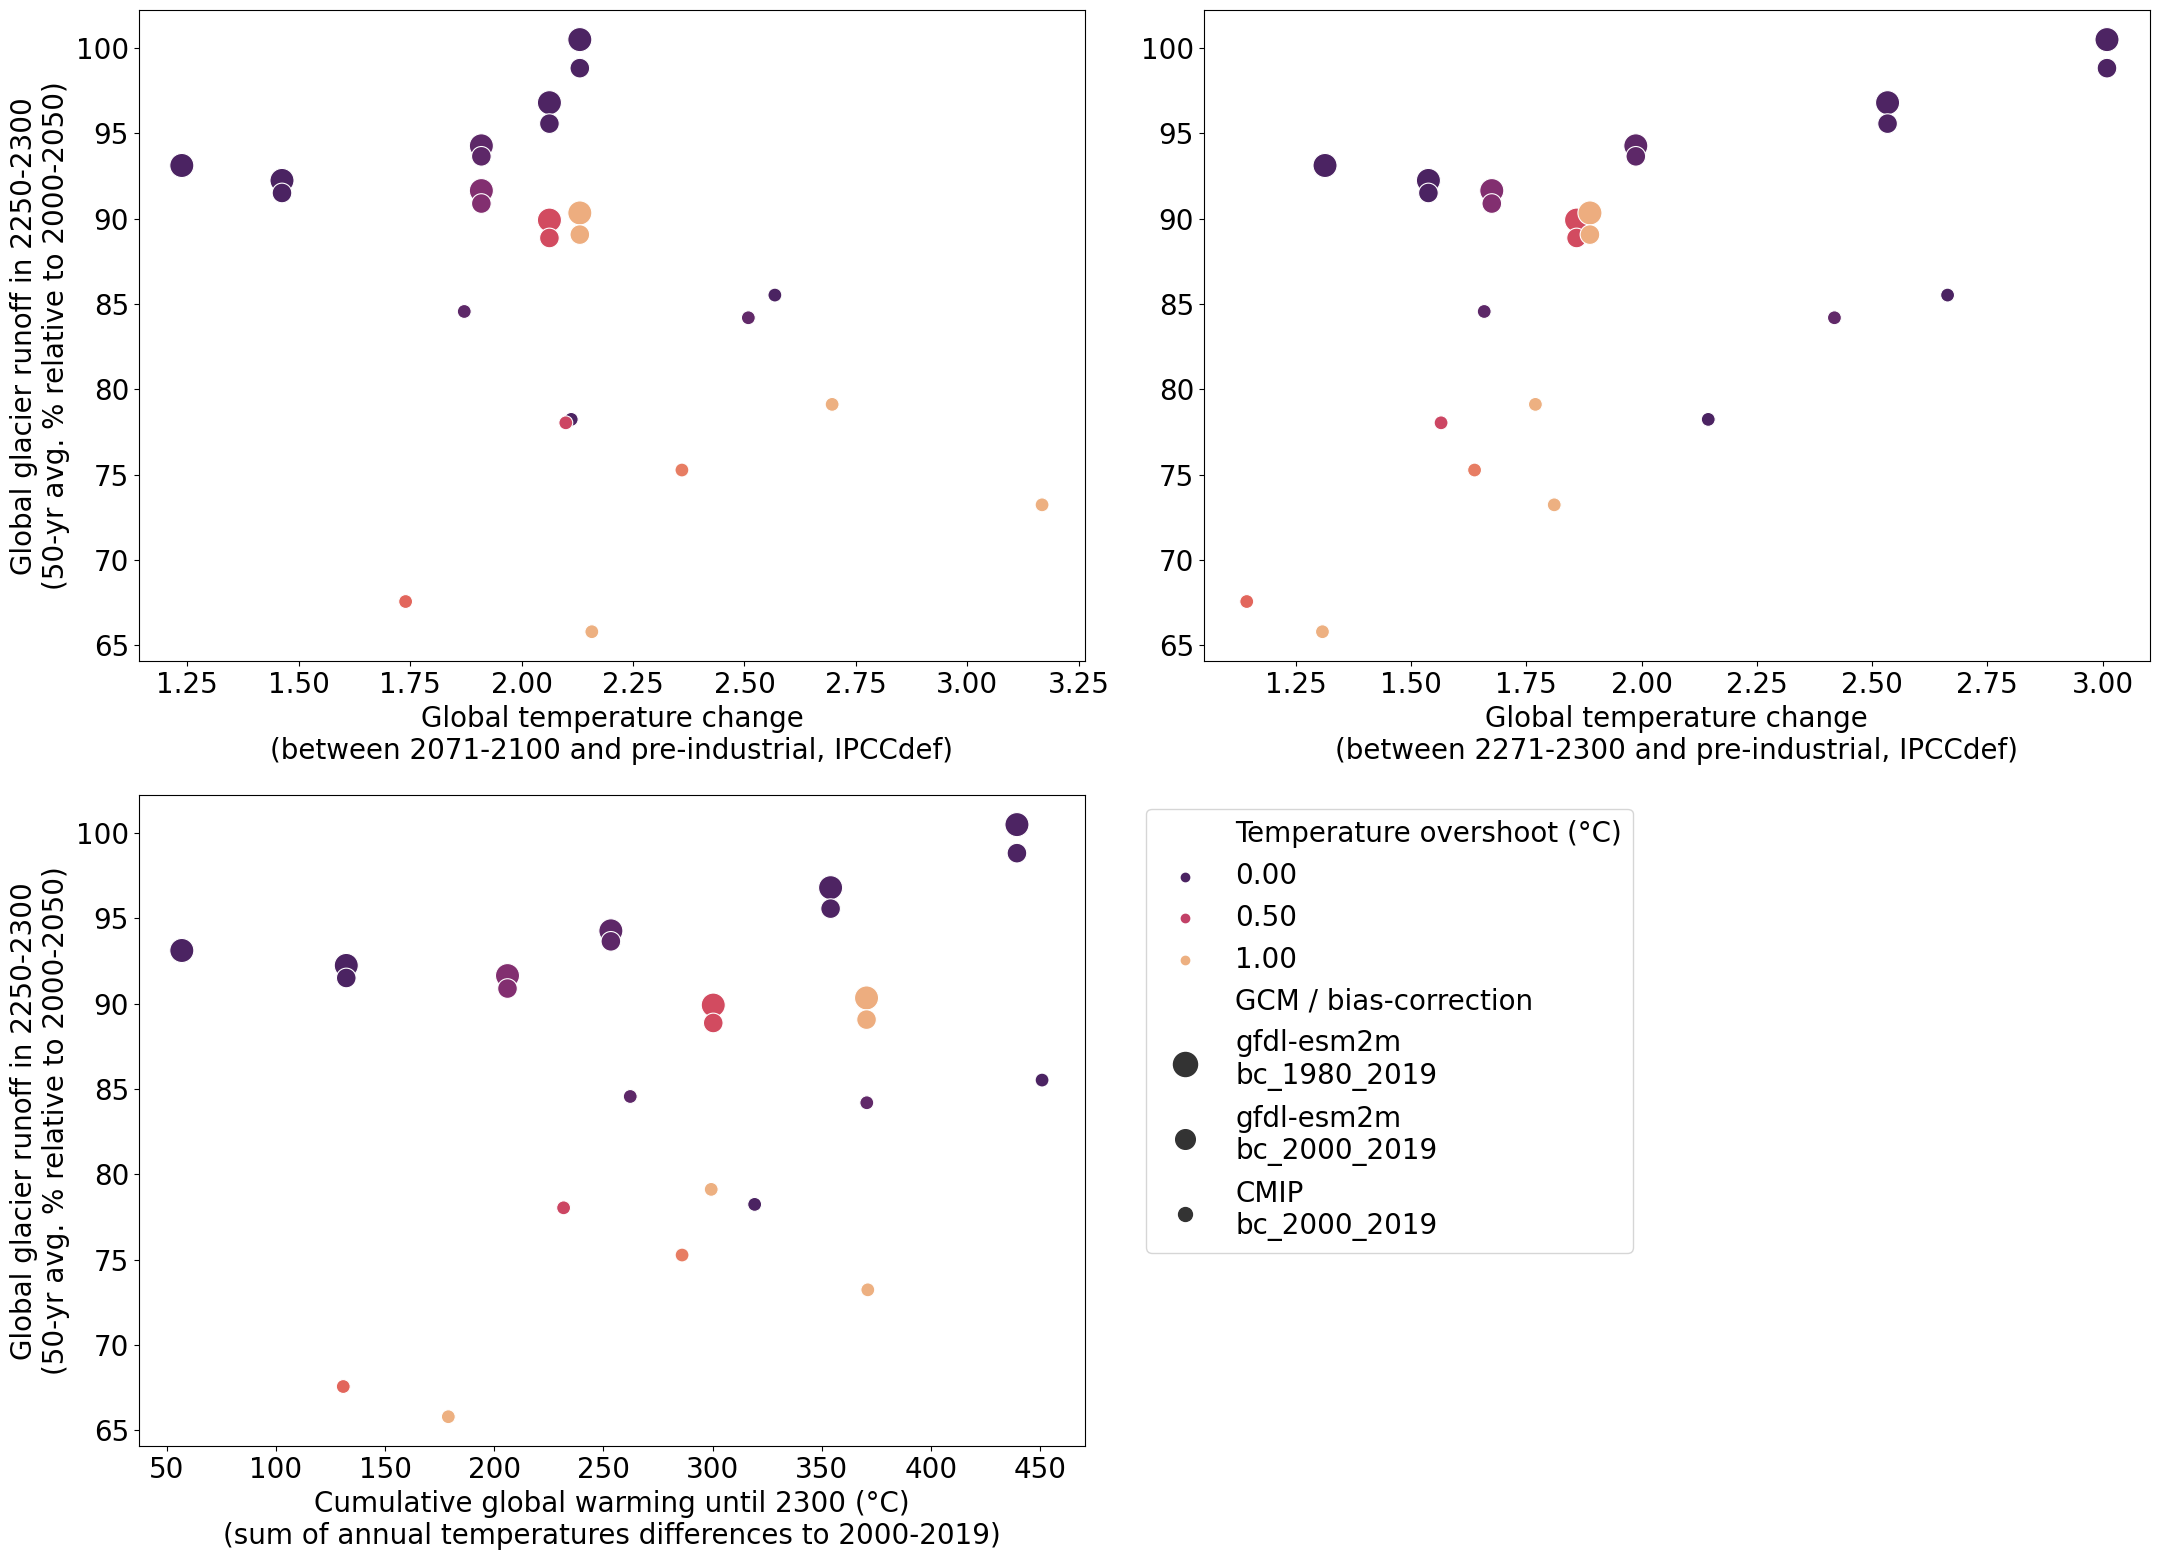

In [33]:
plt.rc('font', size=20)
norm = plt.Normalize(vmin=0.1,vmax=0.9)

plt.figure(figsize=(22,16))
plt.subplot(221)
sns.scatterplot(data=oggm_cum_glob_temp_ch_vs_volume_ch_all,
               y='runoff_2300_50_yr_avg_%', x='temp_ch_2071_2100_ipcc', 
                #style='Model',
                #style_order=['OGGM'],, 'PyGEM-OGGM', 'GloGEM'],
                #style_order = ['no','yes', 'small (SSP 1-2.6)'], 
                size_order = ['gfdl-esm2m\nbc_1980_2019','gfdl-esm2m\nbc_2000_2019', 'CMIP\nbc_2000_2019'],
                hue='overshoot_magnitude', palette='flare_r',# s=100,
                size='gcm_bc', sizes =  [300,200,100], legend=False,
               hue_norm = norm)
plt.ylabel('Global glacier runoff in 2250-2300\n(50-yr avg. % relative to 2000-2050)')

plt.xlabel('Global temperature change\n(between 2071-2100 and pre-industrial, IPCCdef)')


plt.subplot(222)
sns.scatterplot(data=oggm_cum_glob_temp_ch_vs_volume_ch_all,
               y='runoff_2300_50_yr_avg_%', x='temp_ch_2271_2300_ipcc', 
               #style='Model',
                #style_order=['OGGM', 'PyGEM-OGGM', 'GloGEM'],
                #style_order = ['no','yes', 'small (SSP 1-2.6)'], 
                size_order = ['gfdl-esm2m\nbc_1980_2019','gfdl-esm2m\nbc_2000_2019', 'CMIP\nbc_2000_2019'],
                hue='overshoot_magnitude', palette='flare_r',# s=100,
                size='gcm_bc', sizes = [300,200,100], legend=False,
               hue_norm = norm)

plt.ylabel('')
plt.xlabel('Global temperature change\n(between 2271-2300 and pre-industrial, IPCCdef)')

plt.subplot(223)
sns.scatterplot(data=oggm_cum_glob_temp_ch_vs_volume_ch_all,
               y='runoff_2300_50_yr_avg_%', x='cum_temp_ch_2000_2019', #style='Model',
                #style_order=['OGGM', 'PyGEM-OGGM', 'GloGEM'],
                #style_order = ['no','yes', 'small (SSP 1-2.6)'], 
                #size_order = ['gfdl-esm2m_bc_1980_2019','gfdl-esm2m_bc_2000_2019', 'CMIP_bc_2000_2019'],
                size_order = ['gfdl-esm2m\nbc_1980_2019','gfdl-esm2m\nbc_2000_2019', 'CMIP\nbc_2000_2019'],
                hue='overshoot_magnitude', palette='flare_r',# s=100,
                size='gcm_bc', sizes = [300,200,100], legend='brief',
                hue_norm = norm
               )# size='overshoot')

plt.ylabel('Global glacier runoff in 2250-2300\n(50-yr avg. % relative to 2000-2050)')

plt.xlabel('Cumulative global warming until 2300 (°C)\n(sum of annual temperatures differences to 2000-2019)')
handles, labels = plt.gca().get_legend_handles_labels()

handles_n = [handles[0], handles[1], handles[3], handles[5]] + handles[7:]
labels_n = ['Temperature overshoot (°C)', labels[1], labels[3], labels[5]] + ['GCM / bias-correction']+ labels[8:]
plt.tight_layout()

plt.legend(handles_n, labels_n, ncol=1, loc= 'upper left', bbox_to_anchor=(1.05, 1))

#plt.savefig('figures/4_discussion_runoff_gcm_only_oggm_comparison.pdf')
#plt.savefig('figures/4_discussion_runoff_gcm_only_oggm_comparison.png')

## Another way of representing some of the differrnces 

Text(0.5, 0, 'Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')

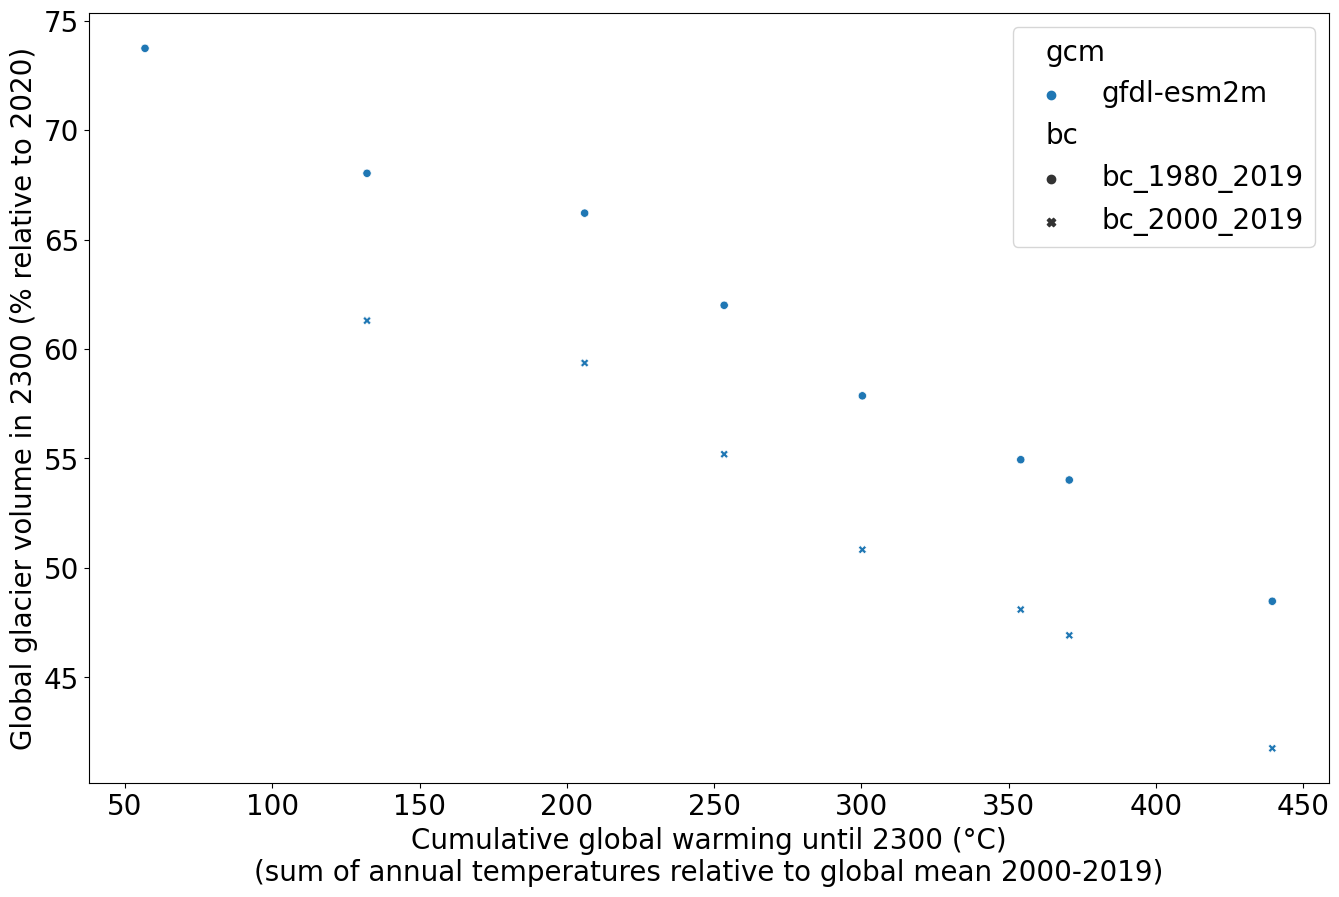

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all,
               y='vol_2300_%', x='cum_temp_ch_2000_2019', hue='gcm', style='bc',
               )# size='overshoot')
plt.ylabel('Global glacier volume in 2300 (% relative to 2020)')
plt.xlabel('Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')